# DIP Mini Project
* 0416235 劉昱劭

In [54]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

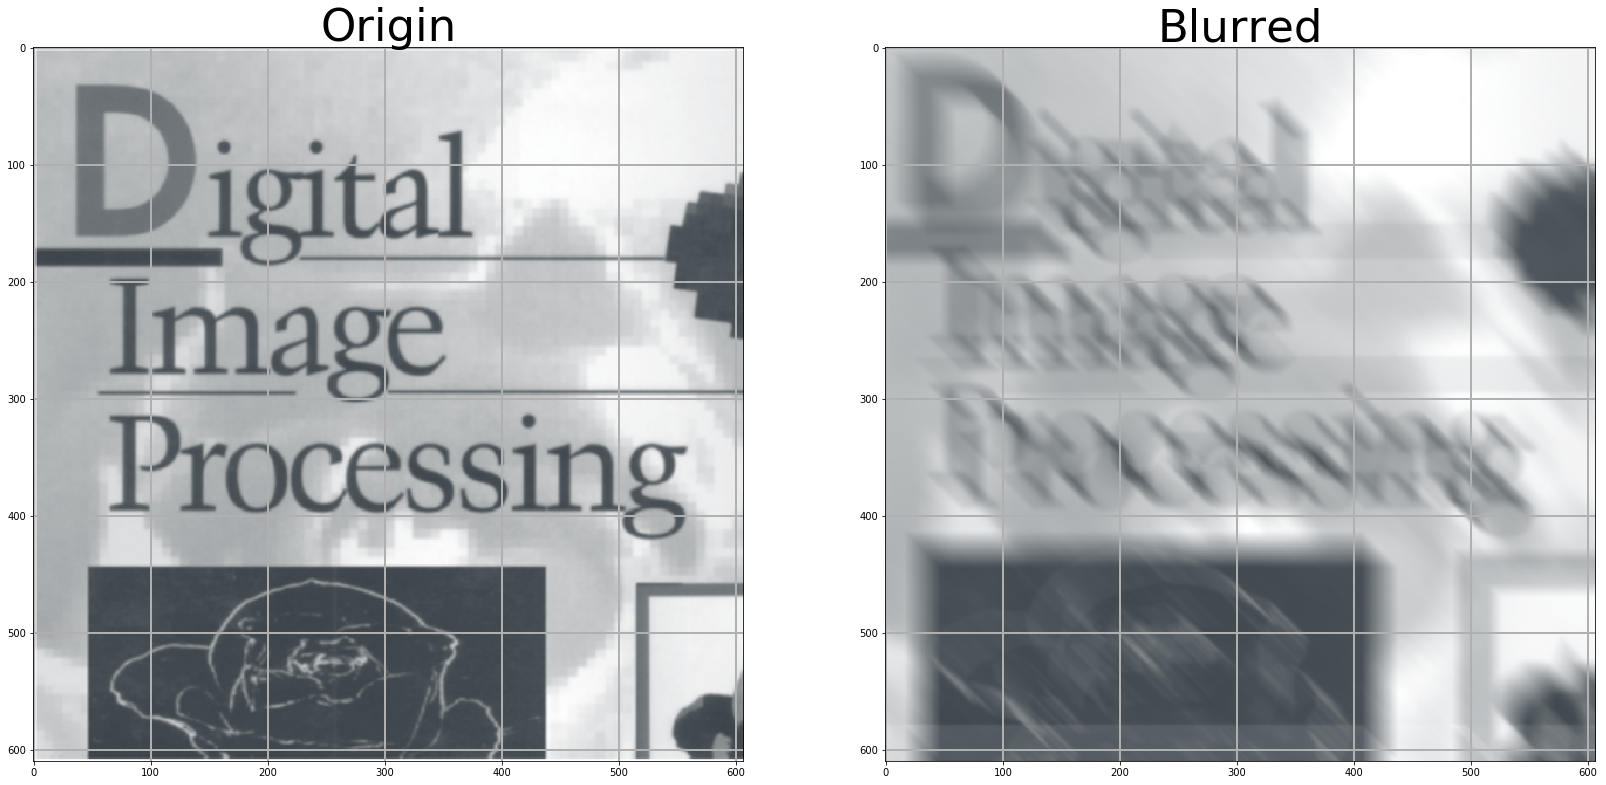

In [176]:
img = cv2.imread('cover.PNG')
plt.figure(figsize=(28,20))
plt.subplot(1, 2, 1)
plt.title('Origin', fontsize=45)
plt.grid(True, linewidth=2)
plt.imshow(img)

size = int(img.shape[0]/10)

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
for i in range(size//2, size):
    kernel_motion_blur[i][i] = 1
kernel_motion_blur = kernel_motion_blur / (size//2)

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)


plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Blurred', fontsize=45)
plt.grid(True, linewidth=2)

plt.show()

## Visualize the filter
* The shape of the window will be size/10 (about 68)
* Only show the 5x5 window in the center.

In [102]:
center = masksize//2
pd.DataFrame(kernel_motion_blur).iloc[center-2:center+3, center-2:center+3]

303  304       305       306       307
303  0.0  0.0  0.000000  0.000000  0.000000
304  0.0  0.0  0.000000  0.000000  0.000000
305  0.0  0.0  4.180328  0.000000  0.000000
306  0.0  0.0  0.000000  4.180328  0.000000
307  0.0  0.0  0.000000  0.000000  4.180328

/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


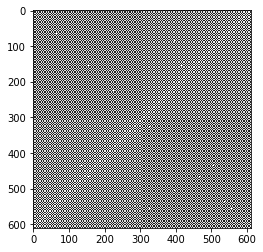

In [106]:
mask = kernel_motion_blur
f = np.fft.fft2(mask)
f1shift = np.fft.fftshift(f)
m1 = np.log(np.abs(f1shift))
plt.imshow(m1,'gray')


In [107]:
m1

array([[  7.15070146,   6.69912317, -31.32854402, ...,   5.60054625,
        -31.62304113,   6.69912317],
       [  6.69912317, -30.29471865,   5.60054625, ..., -31.39630935,
          6.69912317,   7.15070146],
       [-30.73999736,   5.60054625, -30.78382176, ...,   6.69912317,
          7.15070146,   6.69912317],
       ...,
       [  5.60054625, -30.69829584,   6.69912317, ..., -31.01759898,
          5.08979136, -31.36637493],
       [-32.15376454,   6.69912317,   7.15070146, ...,   5.08979136,
        -30.77507191,   5.60054625],
       [  6.69912317,   7.15070146,   6.69912317, ..., -31.11637503,
          5.60054625, -30.46059462]])

## Other testcase

In [4]:
testcase = ['Q1.tif', 'Q2.tif', 'Q3.tif', 'Q4.tif']

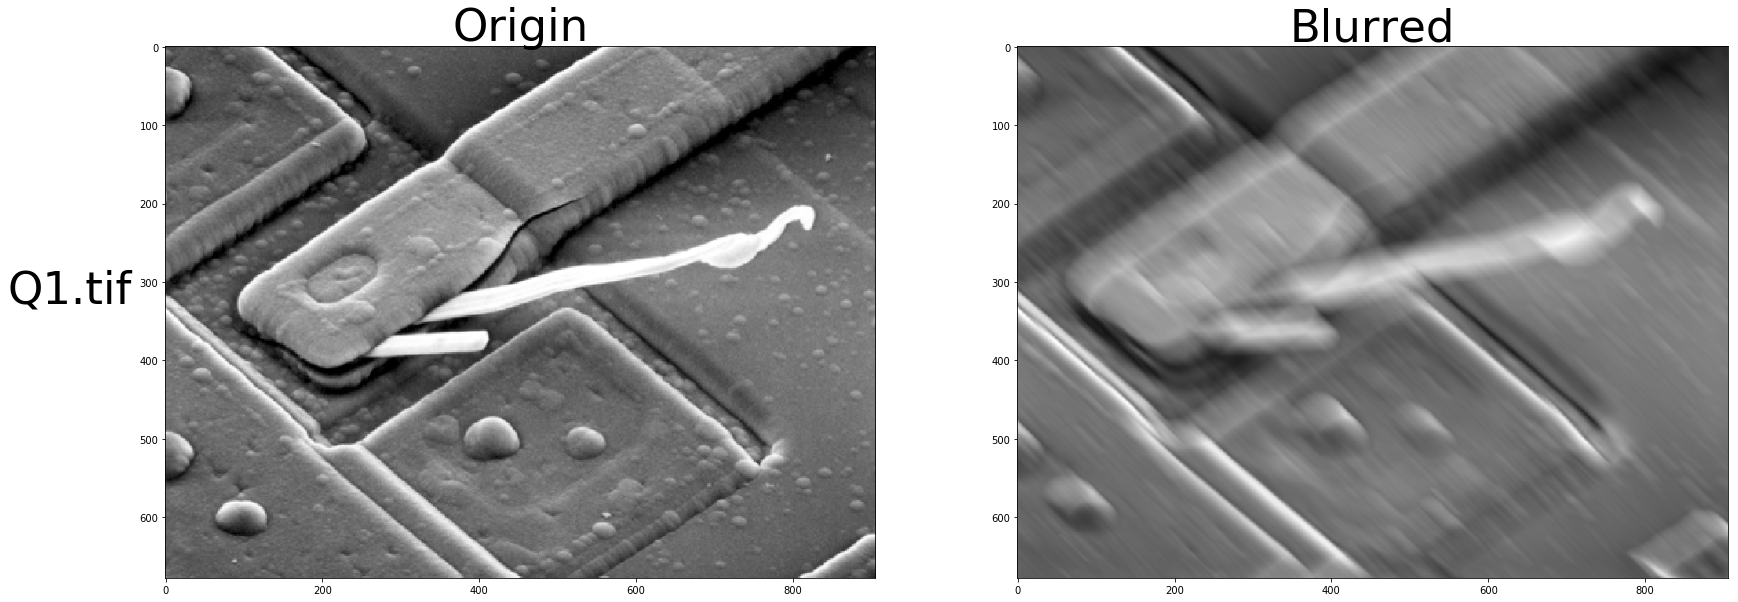

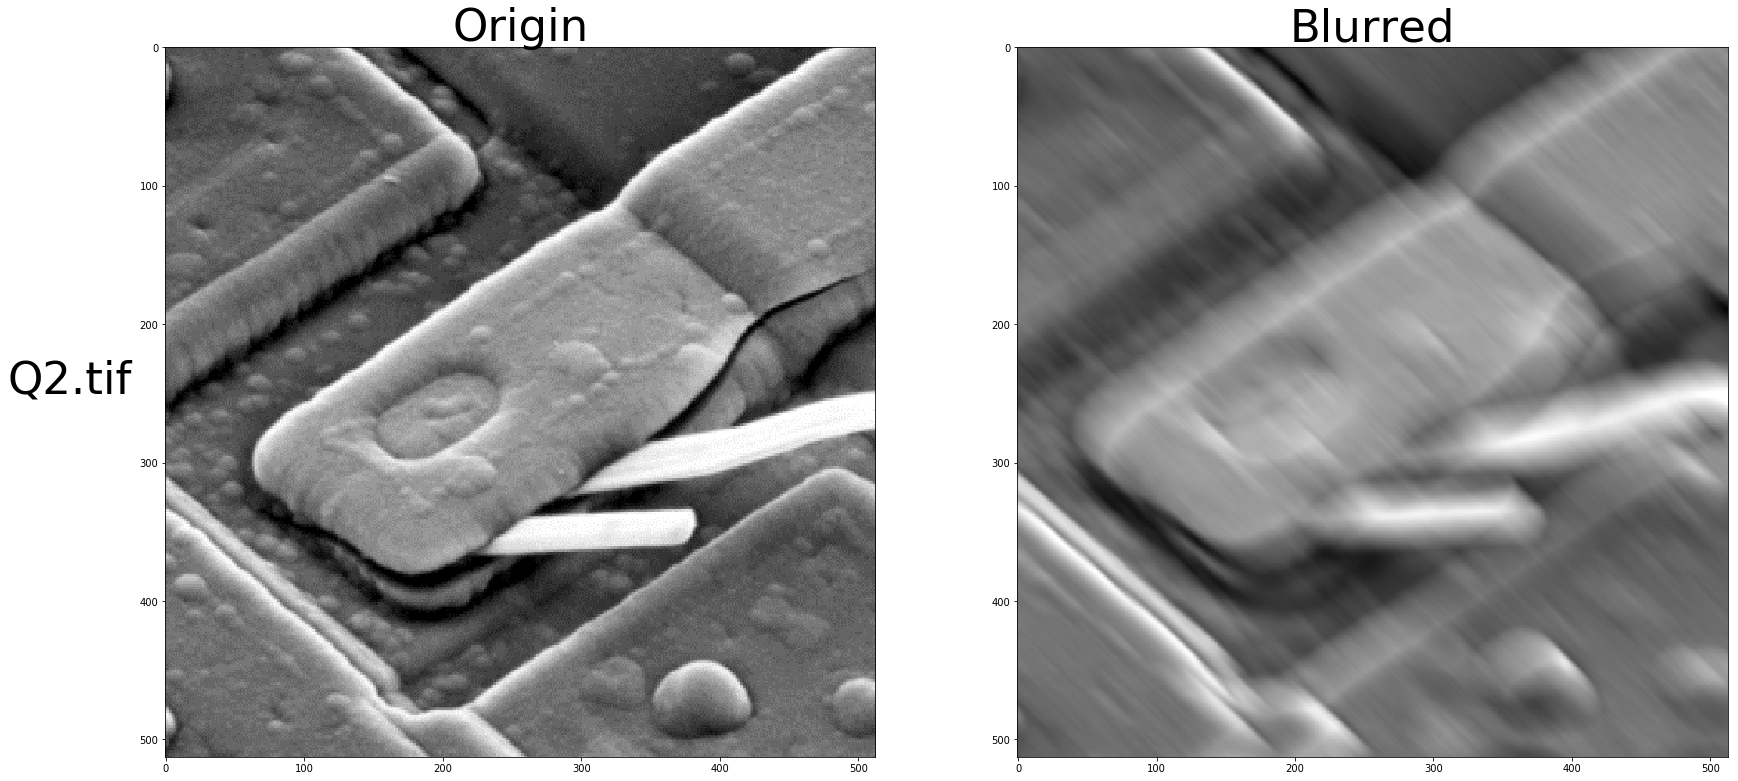

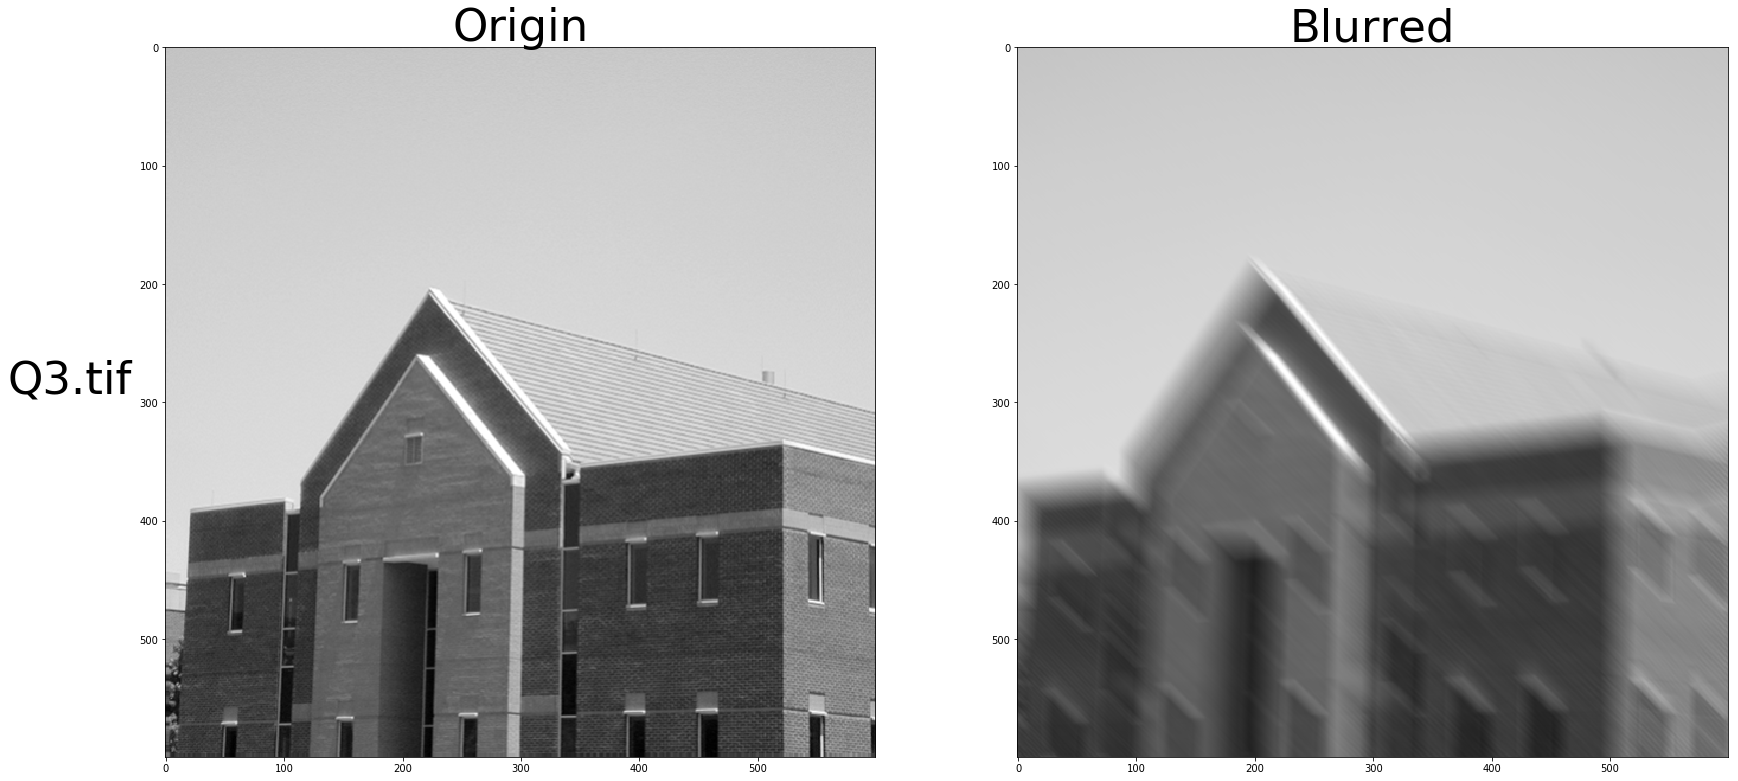

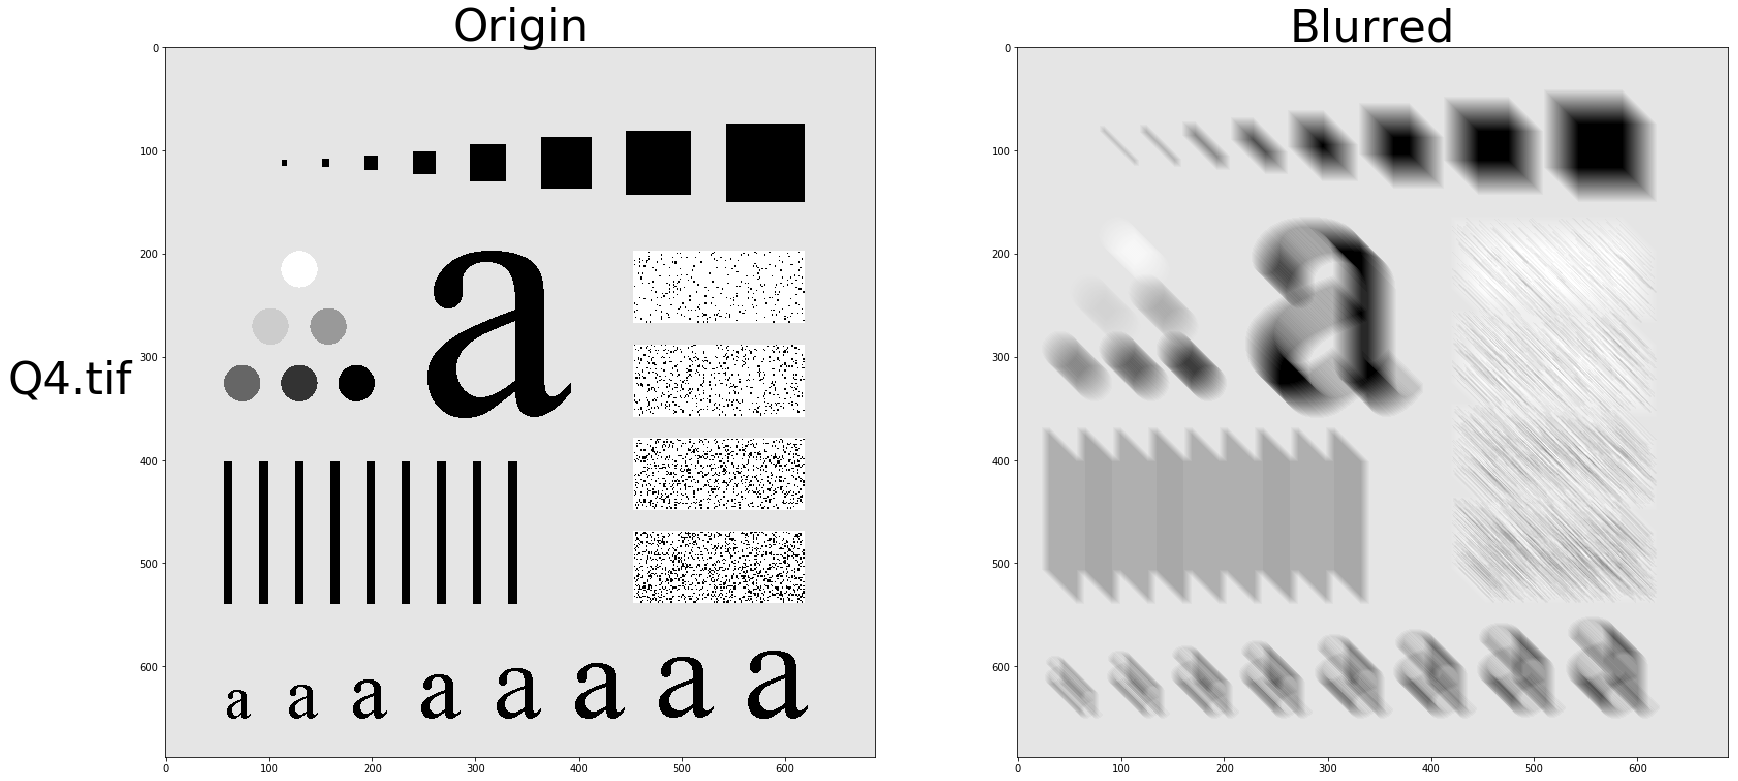

In [5]:
for idx, imgName in enumerate(testcase):

    img = cv2.imread(imgName)
    plt.figure(figsize=(28, 20*len(testcase)))
    plt.subplot(idx+1, 2, 1)
    plt.title('Origin', fontsize=45)
    #plt.grid(True, linewidth=2)
    plt.ylabel(imgName, fontsize=45, labelpad=70, rotation=0)
    plt.imshow(img)

    size = int(img.shape[0]/10)

    # generating the kernel
    kernel_motion_blur = np.zeros((size, size))
    for i in range(size//2, size):
        kernel_motion_blur[i][i] = 1
    kernel_motion_blur = kernel_motion_blur / (size//2)

    # applying the kernel to the input image
    output = cv2.filter2D(img, -1, kernel_motion_blur)


    plt.subplot(idx+1, 2, 2)
    plt.imshow(output)
    plt.title('Blurred', fontsize=45)
    #plt.grid(True, linewidth=2)

plt.show()

/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


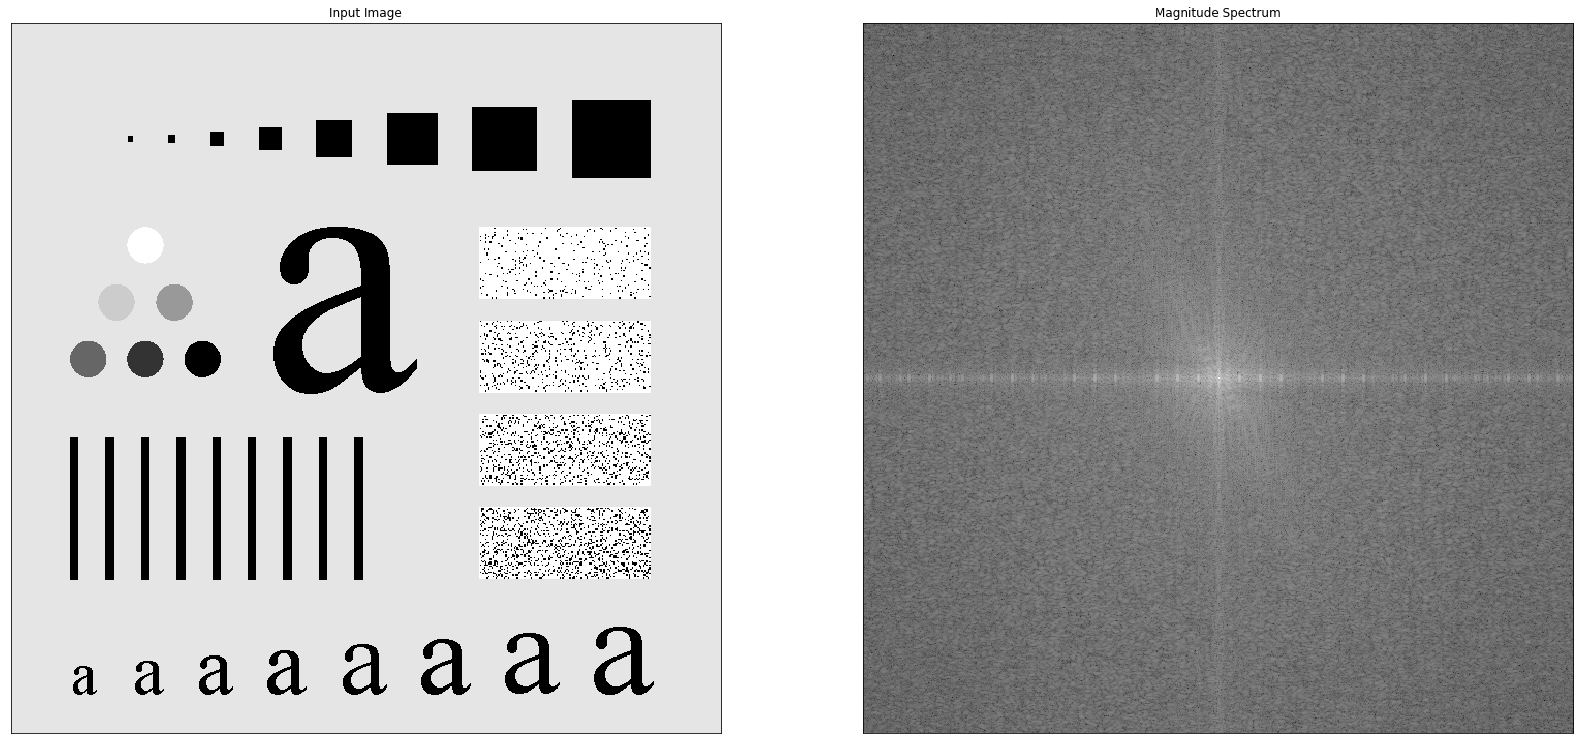

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

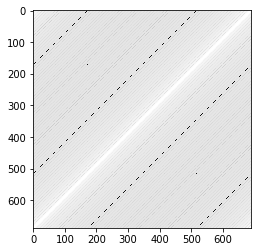

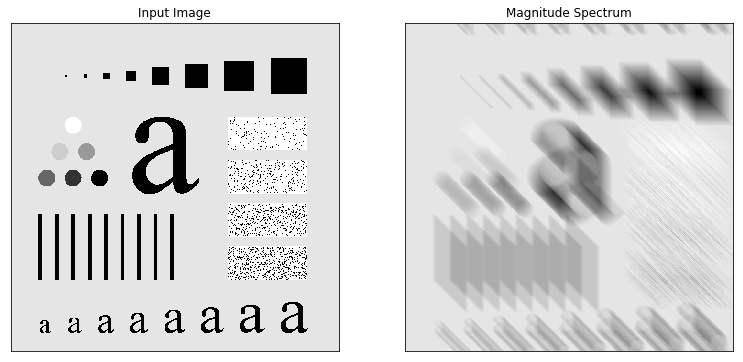

In [340]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(28,20))
img = cv2.imread('Q4.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

kernel_motion_blur = np.zeros((img.shape[0], img.shape[1]))
masksize = kernel_motion_blur.shape[0]

for i in range (0, int(img.shape[0]*0.1)):
    kernel_motion_blur[i][i] = 255


mask = kernel_motion_blur
f1 = np.fft.fft2(mask)
f1shift = np.fft.fftshift(f1)
m1 = np.log(np.abs(f1shift))
plt.imshow(m1,'gray')
m1.shape

# multiply mask
#mask = kernel_motion_blur
#fshift = fshift*mask
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

f_ishift = np.fft.ifftshift(f*f1)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.show()

plt.imshow(m1,'gray')
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


In [170]:
kernel_motion_blur

array([[255.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [160]:
center = masksize//2
pd.DataFrame(f1).iloc[center-2:center+3, center-2:center+3]

337  \
337  (-181.50073935257822+370.426092580272j)   
338  (-81.63678022039328+540.9648986237589j)   
339   (98.17676888562278+624.0646854820259j)   
340    (292.857315065344+588.3443633896275j)   
341  (430.3674662690809+445.89763599155174j)   

                                          338  \
337  (-116.32412176294409+504.2057083239018j)   
338   (48.640617992697216+613.8112448806833j)   
339    (246.55765011589907+608.630664294725j)   
340    (404.5874210802327+489.4950823280536j)   
341     (463.088161197722+299.6169498926063j)   

                                          339  \
337   (1.2620927749744766+596.0714339945105j)   
338     (197.663719531445+621.4797954924466j)   
339    (372.3192549695797+528.4702402651346j)   
340  (459.81604821672437+350.44214897871285j)   
341   (425.6526128133429+153.16204417987427j)   

                                          340  \
337   (147.35930582350818+626.6018660640108j)   
338    (334.3709657578588+561.8926584511382j)   
339    (448.6084166445763+400.0025693891637j)   
340     (445.96027470493+200.41997214447866j)   
341  (324.74193096241765+38.019741557372356j)   

                                          341  
337    (291.6818037452442+588.9699100173829j)  
338   (429.77805222025034+447.0955537064681j)  
339  (458.52998278938173+250.09492595481802j)  
340    (364.7584036103601+71.47778676136397j)  
341   (180.5078183524381-20.358781143690294j)

In [161]:
magnitude_spectrum.shape

(678, 906)

/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(688, 688)

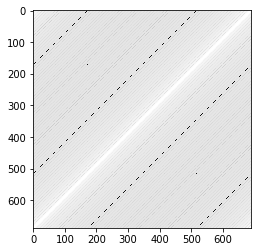

In [307]:
mask = kernel_motion_blur
f = np.fft.fft2(mask)
f1shift = np.fft.fftshift(f)
m1 = np.log(np.abs(f1shift))
plt.imshow(m1,'gray')
m1.shape

In [118]:
m1*magnitude_spectrum

array([[1771.2442024 ,  783.23616632, 1702.67959308, ...,  815.78397674,
        1762.18761453, 1808.88058298],
       [ 817.24670252, 1726.86724575,  815.69523018, ..., 1830.60102329,
        1868.74559527, 1775.03548978],
       [1639.92559208,  822.42940263, 1505.2610202 , ..., 1878.53714863,
        1828.51288094,  802.68301269],
       ...,
       [ 802.68301269, 1828.51288094, 1878.53714863, ..., 1505.2610202 ,
         822.42940263, 1639.92559208],
       [1775.03548978, 1868.74559527, 1830.60102329, ...,  815.69523018,
        1726.86724575,  817.24670252],
       [1808.88058298, 1762.18761453,  815.78397674, ..., 1702.67959308,
         783.23616632, 1771.2442024 ]])

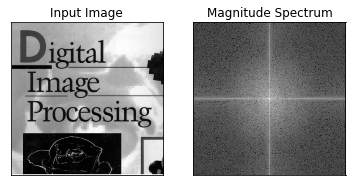

In [164]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cover.PNG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

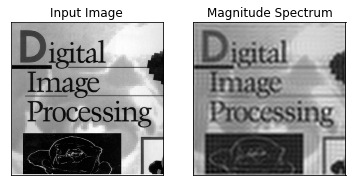

In [22]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
crow,ccol 

(305.0, 303.5)

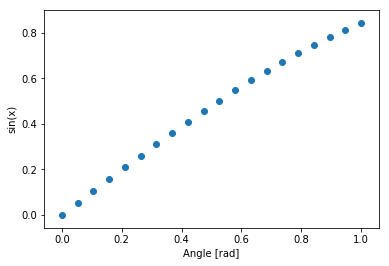

In [159]:
import matplotlib.pylab as plt
x = np.linspace(0, 1, 20)
plt.scatter(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [344]:
planes = [np.zeros((img.shape[0], img.shape[1])), np.zeros((img.shape[0], img.shape[1]))]
#Mat complexImg = Mat::zeros(filter.size(), CV_32F);

offset = img.shape[0] // 2 + img.shape[1] // 2;

#T = 1
a = 0.05

for i in range(img.shape[0]):
    for j in range(img.shape[1]):

        theta = a*(i + j - offset)
        if (False):
            planes[0][i][j] = 1
        else:
            planes[0][i][j] = np.sin(2 * np.pi * a*(i + j - offset)) / (2*np.pi * a*(i + j - offset))
            
        if (False):
            planes[1][i][j] = 0
        else:
            planes[1][i][j] = -np.sin(np.pi*a*(i + j - offset)) * np.sin(np.pi*a*(i + j - offset)) / (np.pi*a*(i + j - offset));

        



/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


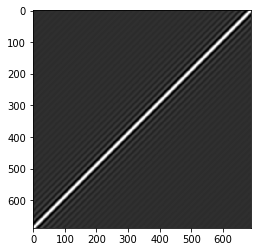

In [345]:
plt.imshow(planes[0],'gray')
RE = np.where(np.isnan(planes[0]), 0, planes[0])

/home/ailurus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-4.78315003, -4.91213896, -5.10374595, ..., -0.82696791,
        -1.1908628 , -1.85923383],
       [-4.91213896, -5.10374595, -5.37156363, ..., -1.1908628 ,
        -1.85923383,        -inf],
       [-5.10374595, -5.37156363, -5.73974276, ..., -1.85923383,
               -inf, -1.85923383],
       ...,
       [-0.82696791, -1.1908628 , -1.85923383, ..., -7.02274528,
        -6.25485049, -5.73974276],
       [-1.1908628 , -1.85923383,        -inf, ..., -6.25485049,
        -5.73974276, -5.37156363],
       [-1.85923383,        -inf, -1.85923383, ..., -5.73974276,
        -5.37156363, -5.10374595]])

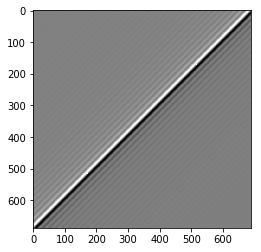

In [346]:
plt.imshow(planes[1],'gray')
IM = np.where(np.isnan(planes[1]), 0, planes[1])
m1 = np.log(np.abs(IM))
m1

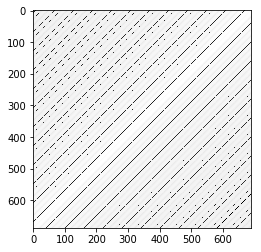

In [347]:
plt.imshow(m1,'gray')

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

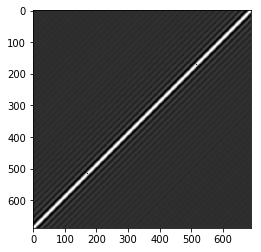

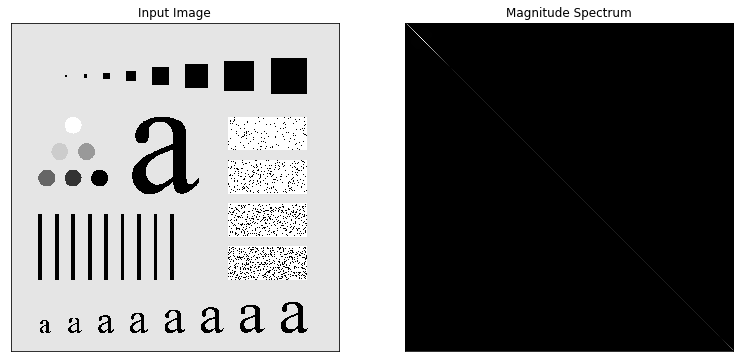

In [339]:
mask = RE
f_ishift = np.fft.ifftshift(f*mask)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.show()

plt.imshow(mask,'gray')
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])




In [336]:
img_back

array([[ 702.01573567,   49.19769154,   41.15512321, ...,   65.54096832,
          74.07149731,   39.9066869 ],
       [  49.19769154,  558.48423845,   33.11436439, ...,   36.94509337,
          33.11980034,   44.54513025],
       [  41.15512321,   33.11436439,  489.30604461, ...,   23.03536311,
          16.74978399,   40.73569778],
       ...,
       [  65.54096832,   36.94509337,   23.03536311, ...,  155.3195638 ,
          48.47746065,  118.09907838],
       [  74.07149731,   33.11980034,   16.74978399, ...,   48.47746065,
         254.57975313,  187.72699037],
       [  39.9066869 ,   44.54513025,   40.73569778, ...,  118.09907838,
         187.72699037, 1184.69518219]])

In [334]:
mask

array([[-4.78315003, -4.91213896, -5.10374595, ..., -0.82696791,
        -1.1908628 , -1.85923383],
       [-4.91213896, -5.10374595, -5.37156363, ..., -1.1908628 ,
        -1.85923383,  0.        ],
       [-5.10374595, -5.37156363, -5.73974276, ..., -1.85923383,
         0.        , -1.85923383],
       ...,
       [-0.82696791, -1.1908628 , -1.85923383, ..., -7.02274528,
        -6.25485049, -5.73974276],
       [-1.1908628 , -1.85923383,  0.        , ..., -6.25485049,
        -5.73974276, -5.37156363],
       [-1.85923383,  0.        , -1.85923383, ..., -5.73974276,
        -5.37156363, -5.10374595]])

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(28,20))
img = cv2.imread('cover.PNG',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

kernel_motion_blur = np.zeros((img.shape[0], img.shape[1]))
masksize = kernel_motion_blur.shape[0]

for i in range (0, int(img.shape[0]*0.1)):
    kernel_motion_blur[i][i] = 255


mask = planes[0]
f2 = np.fft.fft2(mask)
f2shift = np.fft.fftshift(f2)
m2 = np.log(np.abs(f2shift))
plt.imshow(m2,'gray')
m2.shape

# multiply mask
#mask = kernel_motion_blur
#fshift = fshift*mask
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

f_ishift = np.fft.ifftshift(f*f1)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.show()

plt.imshow(m1,'gray')
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


In [216]:
planes[1].shape

(610, 607)

In [ ]:
merge(planes, 2, complexImg);

split(complexImg, planes);	// planes[0] = Re(DFT(I)), planes[1] = Im(DFT(I)) 
Mat magImg;
magnitude(planes[0], planes[1], magImg);	// planes[0] = magnitude (input, input, output)

magImg += Scalar::all(1);	// magImg = log(1+planes[0])
log(magImg, magImg);

// crop the spectrum, if it has an odd number of rows or columns
magImg = magImg(Rect(0, 0, magImg.cols & -2, magImg.rows & -2));
// let the origin in the center of img
int cx = 0;// magImg.cols / 2;
int cy = 0;// magImg.rows / 2;

Mat q0(magImg, Rect(0, 0, cx, cy));
Mat q1(magImg, Rect(cx, 0, cx, cy));
Mat q2(magImg, Rect(0, cy, cx, cy));
Mat q3(magImg, Rect(cx, cy, cx, cy));

Mat tmp;	//exchange Top-Left with Bottom-Right
q0.copyTo(tmp);
q3.copyTo(q0);
tmp.copyTo(q3);
q1.copyTo(tmp);
q2.copyTo(q1);
tmp.copyTo(q2);

# normalize(magImg, magImg, 1, 0, CV_MINMAX);
imshow("filter in frequency", magImg);
magImg.convertTo(magImg, CV_8U, 255);
#imwrite("Fig3_filter.png", magImg);